In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# **Random Numerical Values Imputation**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
# TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
# CREATING NEW COLUMNS

X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [8]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [10]:
# TOTAL 148 VALUES ARE NA IN AGE

X_train['Age'].isnull().sum()

np.int64(148)

In [12]:
# FILLING NA VALUES IN AGE WITH RANDOM VALUE GENERATED FROM THE AGE ITSELF

X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum(), random_state=42).values
)

X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum(), random_state=42).values
)

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,54.0
493,71.0,49.5042,71.0
527,NaN,221.7792,28.0


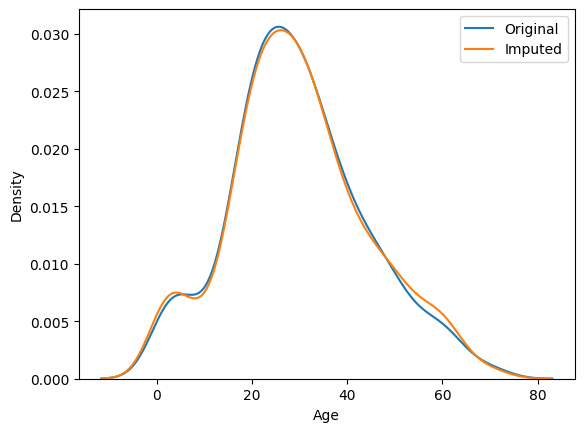

In [16]:
# THE DISTRIBUTION IS SAME BEFORE AND AFTER IMPUTATION (GREEN FLAG)

sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [17]:
# VARIANCE IS ALSO ALMOST SAME

print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  213.1455478371577


In [18]:
# COVARIANCE SUFFERED A LOT IN SOME CASES

X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,57.330151
Age,71.512440,204.349513,204.349513
Age_imputed,57.330151,204.349513,213.145548


<Axes: >

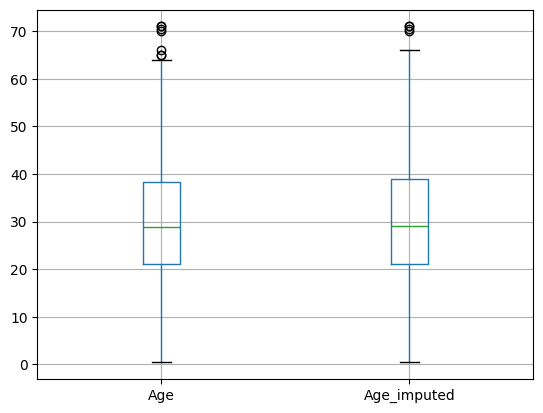

In [19]:
# NO SIGNIFICANT EFFECT ON OUTLIERS

X_train[['Age', 'Age_imputed']].boxplot()

> there is a problem with random values imputation that the user may get ***different outputs every time*** even though he enters same data.
> for example, a user enters same fare value everytime but doesn't enter age. In such case, he/she will get different result everytime he executes the code as ***Age is being randomly selected every time***, which is not desired of course.

---

> For this, we can ***fix a seed of randomness*** such that the Imputed Age remains same for some fixed value in some other column (say Fare)

---

In [ ]:
# setting a fixed seed for Random AGE Imputation
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

# **Random Categorical Values Imputation**

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/house-train.csv', usecols=['GarageQual', 'FireplaceQu',
                                                                                                                                                                       'SalePrice'])

In [23]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
data.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [25]:
X = data
y = data['SalePrice']

In [26]:
# TRAIN TEST SPLIT

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [28]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
549,Gd,TA,263000,TA,Gd
1136,NaN,TA,119000,TA,NaN
737,Gd,TA,239900,TA,Gd
201,Fa,TA,171500,TA,Fa
1157,Gd,TA,230000,TA,Gd


In [31]:
# FILLING MISSING VALUES WITH RANDOM CATEGORICAL VALUES IN CATEGORICAL COLUMNS

X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(X_train['GarageQual_imputed'].isnull().sum(), random_state=42)
    .values
)

X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(X_test['GarageQual_imputed'].isnull().sum(), random_state=42)
    .values
)


X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna()
    .sample(X_train['FireplaceQu_imputed'].isnull().sum(), random_state=42)
    .values
)

X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna()
    .sample(X_test['FireplaceQu_imputed'].isnull().sum(), random_state=42)
    .values
)


In [33]:
# COMAPARING FREQUENCIES OF EACH CATEGORY BEFORE AND AFTER IMPUTATION WITH RANDOM VALUES (ALMOST SAME FOR GARAGEQUAL, WHICH HAD APPROX 5% MISSING DATA INITIALLY)

temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [34]:
# COMAPARING FREQUENCIES OF EACH CATEGORY BEFORE AND AFTER IMPUTATION WITH RANDOM VALUES (CHANGED A LOT FOR FIREPLACEQU, WHICH HAD APPROX 47% MISSING DATA INITIALLY)

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.644220
TA,0.412439,0.543210
Fa,0.040917,0.054994
Po,0.027823,0.035915
Ex,0.024550,0.032548


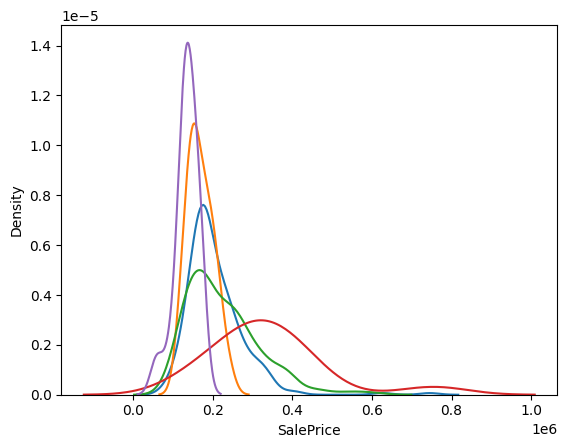

In [36]:
# DISTRIBUTIONS OF DIFFERENT CATEGORIES BEFORE IMPUTATION

for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

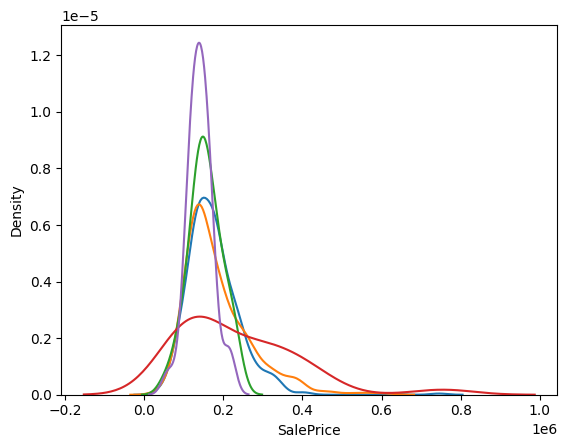

In [37]:
# DISTRIBUTION OF DIFFERENT CATEGORIES AFTER IMPUTATION (CHANGED A LOT)

for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()